In [1]:
#import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob,iglob
import pickle
import seaborn as sns
import os, sys
import subprocess as sp
import MDAnalysis as mda
import panedr
from ase.io import read,write
from ase.visualize import view
from ase.io.trajectory import Trajectory
from ase.io.lammpsdata import read_lammps_data as read_lmp
import nglview
from molmass import Formula
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import random
#plt.style.use('hargu_seaborn')

def line(x,m,c):
    return m*x+c
##https://reader.elsevier.com/reader/sd/pii/S003238611630074X?token=964C73218EF46E4B1D21A7BFAA533DAF02A78AD3C68728A049B766A7725EDF3DB8D80FC98810D75D0381E9CAD9D415B7&originRegion=eu-west-1&originCreation=20210611120737
def xi(m1,c1,m2,c2):
    xi = (c1-c2) / (m2-m1)
    return xi
def yi(m1,c1,m2,c2):
    xi = (c1-c2) / (m2-m1)
    yi = m1 * xi + c1
    return 

SYSDIR='/home/harish/GroPolBul'

/home/harish/miniconda3/envs/harish_env/lib/python3.7/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [9]:
#To get formula and molecular weight and visualize
%pwd
#pol=read('polymer.pdb')
#pol=read('polymers/PEO_OH_100mer/PEO_polymer.pdb')
pol=read('../PEO_litfsi_nmer/MD/initial/PEO_OH_250mer.pdb')
vi=nglview.show_ase(pol)
#vi.add_label(radius=2.2,color='black',label_type='atomindex')
print(pol.get_chemical_formula())
print(Formula(pol.get_chemical_formula()).mass)
vi
#Check the atom indices from mol



NGLWidget()

C498H998O250
10987.124888


# Folder Description and Workflow

To generate Polymers using short monomer/polymer chains using GAFF parameters and ambertools


In [3]:
#%mkdir monomers shortchains polymers

# Polymer Builder

In [6]:
%cd $SYSDIR

/cfs/klemming/nobackup/h/hargu978/GroPolBul


## Monomer Details

In [10]:
##Give short polymer name and charge
poly=input("Polymer abbrevation? (3 or 4 letters and preferable in caps): ") or "PEO"
endg=input("End group? (3 or 4 letters and preferable in caps): ") or "OH"
charge=input("Charge of the molecule: ") or "0"
print(poly,charge)
%mkdir {SYSDIR}/monomers/{poly}_{endg}

Polymer abbrevation? (3 or 4 letters and preferable in caps): 
End group? (3 or 4 letters and preferable in caps): 
Charge of the molecule: 
PEO 0
mkdir: cannot create directory ‘/home/harish/GroPolBul/monomers/PEO_OH’: File exists


In [44]:
#mol=read('PCL_left/'+str(poly)+'.acpype/sqm.pdb')
%cd {SYSDIR}
mol=read('monomers/'+str(poly)+'_'+str(endg)+'/'+str(poly)+'_monomer.pdb')
vi=nglview.show_ase(mol)
write('monomers/'+str(poly)+'_'+str(endg)+'/'+str(poly)+'_monomer.png', mol,rotation='60y,20z,-90x')
vi.add_label(radius=2.2,color='black',label_type='atomindex')
vi

#Check the atom indices from mol

/home/harish/GroPolBul


NGLWidget()

In [45]:
view(mol)

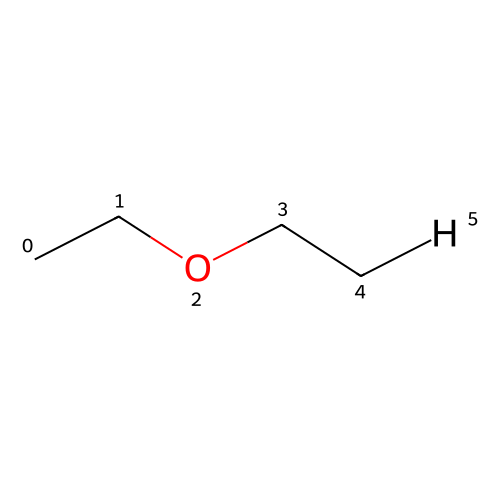

In [43]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500
params = Chem.SmilesParserParams()
params.removeHs=False # draw and work with explicit Hs

#IPythonConsole.drawOptions.additionalAtomLabelPadding
#mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65",params)
mol = Chem.MolFromSmiles("CCOCC[H]",params)
#mol = Chem.MolFromPDBFile('monomers/'+str(poly)+'_'+str(endg)+'/'+str(poly)+'_monomer.pdb')
mol
#Chem.MolToPDBFile(mol,'test.pdb')

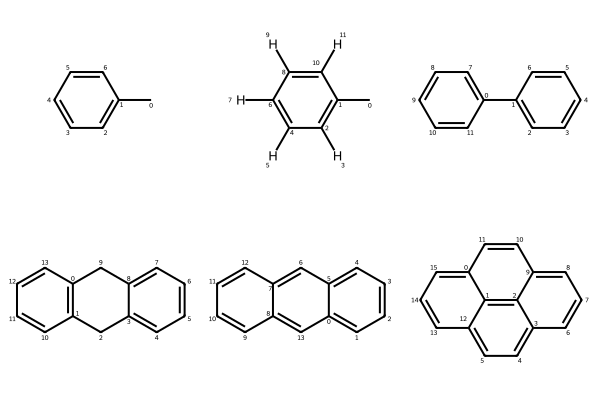

In [27]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = ['CC1=CC=CC=C1','CC1=C([H])C([H])=C([H])C([H])=C1[H]',
          'C1(C2=CC=CC=C2)=CC=CC=C1','C12=C(CC3=CC=CC=C3C2)C=CC=C1',
          'C12=CC=CC=C1C=C3C(C=CC=C3)=C2','C12=C(C(C(C=C3)=CC=C4)=C4C=C2)C3=CC=C1']

params = Chem.SmilesParserParams()
params.removeHs=False # draw and work with explicit Hs
mols = [Chem.MolFromSmiles(s, params) for s in smiles]
Draw.MolsToGridImage(mols, molsPerRow=3)

## Parameterize for monomer 

In [216]:
print('''
###Run in BESKOW
cd '''+str(SYSDIR)+'''/monomers/'''+str(poly)+'''_'''+str(endg)+'''
module load amber/18.ambertools19
antechamber -i '''+str(poly)+'''_monomer.pdb -fi pdb -o '''+str(poly)+'''_monomer.mol2 -fo mol2
'''+str(SYSDIR)+'''/acpype.py -i '''+str(poly)+'''_monomer.mol2 -b '''+str(poly)+''' -n 0
''')


###Run in BESKOW
cd /cfs/klemming/nobackup/h/hargu978/GroPolBul/monomers/SLF_LCH3
module load amber/18.ambertools19
antechamber -i SLF_monomer.pdb -fi pdb -o SLF_monomer.mol2 -fo mol2
/cfs/klemming/nobackup/h/hargu978/GroPolBul/acpype.py -i SLF_monomer.mol2 -b SLF -n 0



In [217]:
#%%bash
%cd {SYSDIR}/monomers/{poly}_{endg}

%cp {poly}.acpype/ANTECHAMBER_AC.AC .
%mv ANTECHAMBER_AC.AC {poly}.ac
#Atom names and types are in poly.ac file
%cd {SYSDIR}

/cfs/klemming/nobackup/h/hargu978/GroPolBul/monomers/SLF_LCH3
/cfs/klemming/nobackup/h/hargu978/GroPolBul


## Defining repeat unit, head and tail for polymer

In [245]:
#Defining CHAIN HEAD and TAIL
%cd {SYSDIR}/monomers/{poly}_{endg}
ac=open(str(poly)+'.ac',mode='r') #Reading .ac file
[next(ac) for _ in range(2)] #Skipping first two lines of text
l=ac.readlines() #Reading lines
#Breaking the parts of monomer to CHAIN, HEAD and TAIL
chain=open(str(poly)+'.chain','w+');head=open(str(poly)+'.head','w+');tail=open(str(poly)+'.tail','w+')
#Atom index where head and tail of monomer
#Check from above ngl view of mol
head_id=int(input("Head atom index: ") or 0)
tail_id=int(input("Tail atom index: ") or 13)

chain.write('HEAD_NAME '+str(l[head_id].split()[2])+'\n')
tail.write('HEAD_NAME '+str(l[head_id].split()[2])+'\n')
chain.write('TAIL_NAME '+str(l[tail_id].split()[2])+'\n')
head.write('TAIL_NAME '+str(l[tail_id].split()[2])+'\n')

head_omit=input("Atom indices to omit near head: ").split() or [1, 2, 3, 4]
tail_omit=input("Atom indices to omit near tail: ").split() or [75, 76]

for i in range(len(head_omit)):
	chain.write('OMIT_NAME '+str(l[int(head_omit[i])].split()[2])+'\n')
	tail.write('OMIT_NAME '+str(l[int(head_omit[i])].split()[2])+'\n')
chain.write('PRE_HEAD_TYPE '+str(l[tail_id].split()[9])+'\n')
tail.write('PRE_HEAD_TYPE '+str(l[tail_id].split()[9])+'\n')
tail.write('CHARGE '+str(charge))

for i in range(len(tail_omit)):
	chain.write('OMIT_NAME '+str(l[int(tail_omit[i])].split()[2])+'\n')
	head.write('OMIT_NAME '+str(l[int(tail_omit[i])].split()[2])+'\n')
chain.write('POST_TAIL_TYPE '+str(l[head_id].split()[9])+'\n')
chain.write('CHARGE '+str(float(charge)))
head.write('POST_TAIL_TYPE '+str(l[head_id].split()[9])+'\n')
head.write('CHARGE '+str(float(charge)))

chain.close();head.close();tail.close()
%ls
%cd {SYSDIR}

/cfs/klemming/nobackup/h/hargu978/GroPolBul/monomers/SLF_LCH3
Head atom index: 22
Tail atom index: 14
Atom indices to omit near head: 23 46 47 48
Atom indices to omit near tail: 20 41 42 43
ANTECHAMBER_AC.AC0         HPT.prepi   SLF.acpype/  SLF.tail          TPT.prepi
ANTECHAMBER_BOND_TYPE.AC   NEWPDB.PDB  SLF.chain    SLF_monomer.mol2
ANTECHAMBER_BOND_TYPE.AC0  PREP.INF    SLF.head     SLF_monomer.pdb
ATOMTYPE.INF               SLF.ac      SLF.prepi    SLF_monomer.png
/cfs/klemming/nobackup/h/hargu978/GroPolBul


In [219]:
vi

NGLWidget(n_components=1)

In [246]:
%%bash
#module load amber/18.ambertools19
module load amber/16.at17
poly=SLF;endg=LCH3
cd monomers/${poly}_${endg}
prepgen -i $poly.ac -o $poly.prepi -f prepi -m $poly.chain -rn $poly -rf $poly.res
prepgen -i $poly.ac -o HPT.prepi -f prepi -m $poly.head -rn HPT -rf HPT.res
prepgen -i $poly.ac -o TPT.prepi -f prepi -m $poly.tail -rn TPT -rf TPT.res 


PRE_HEAD_TYPE is    cc
POST_TAIL_TYPE is    c3
Net charge of truncated molecule is     0.00
TAIL_ATOM     15   C9
HEAD_ATOM     23  C13
MAIN_CHAIN     1   23  C13
MAIN_CHAIN     2   15   C9
OMIT_ATOM      1   24  C14
OMIT_ATOM      2   47  H22
OMIT_ATOM      3   48  H23
OMIT_ATOM      4   49  H24
OMIT_ATOM      5   21  C12
OMIT_ATOM      6   42  H17
OMIT_ATOM      7   43  H18
OMIT_ATOM      8   44  H19
Number of mainchain atoms (including head and tail atom):     2
Number of omited atoms:     8
         change "M" to "-M" if ATOM N4 is linked to the immediate previous residue
         change "M" to "+M" if ATOM N4 is linked to the immediate after residue
POST_TAIL_TYPE is    c3
Net charge of truncated molecule is     0.00
TAIL_ATOM     15   C9
MAIN_CHAIN     1   15   C9
OMIT_ATOM      1   21  C12
OMIT_ATOM      2   42  H17
OMIT_ATOM      3   43  H18
OMIT_ATOM      4   44  H19
Number of mainchain atoms (including head and tail atom):     1
Number of omited atoms:     4
         change 

## Build desired polymer for above derived parameters

In [51]:
poly=input("Polymer abbrevation? (3 or 4 letters and preferable in caps): ") or "PEO"
endg=input("End group? (3 or 4 letters and preferable in caps): ") or "OH"
mon_dir='monomers/'+str(poly)+'_'+str(endg)
n_mono=int(input("Number of monomers in the polymer: ") or 15)
pol_dir='polymers/'+str(poly)+'_'+str(endg)+'_'+str(n_mono)+'mer'

Polymer abbrevation? (3 or 4 letters and preferable in caps): SLF
End group? (3 or 4 letters and preferable in caps): CH3
Number of monomers in the polymer: 3


In [54]:

!echo {pol_dir}
%mkdir {pol_dir}
%cd {pol_dir}
repeat=" ".join([poly] * int(int(n_mono)/1 - 2))
print(repeat)
tleap=open('tleap.in','w+')
tleap.write('source leaprc.gaff'+'\n'+
			'loadamberprep '+str(SYSDIR)+'/'+str(mon_dir)+'/'+str(poly)+'.prepi'+'\n'+
			'loadamberprep '+str(SYSDIR)+'/'+str(mon_dir)+'/HPT.prepi'+'\n'+
			'loadamberprep '+str(SYSDIR)+'/'+str(mon_dir)+'/TPT.prepi'+'\n'+
			'mol = sequence {HPT '+str(repeat)+' TPT}'+'\n'+
			'savepdb mol '+str(poly)+'_polymer.pdb'+'\n'+
			'saveamberparm mol '+str(poly)+'_polymer.prmtop '+str(poly)+'_polymer.inpcrd'+'\n'+
			'quit'
			)		
tleap.close()
%cd {SYSDIR}

polymers/SLF_CH3_3mer
mkdir: cannot create directory 'polymers/SLF_CH3_3mer': File exists
/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/SLF_CH3_3mer
SLF
/cfs/klemming/nobackup/h/hargu978/GroPolBul


In [21]:
%%bash
module load amber/16.at17
module load gromacs

SYSDIR=/cfs/klemming/nobackup/h/hargu978
poly=PEO;endg=OH;nmon=100
cd ${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/

 
tleap -s -f tleap.in > tleap.out
/cfs/klemming/nobackup/h/hargu978/GroPolBul/acpype.py -p ${poly}_polymer.prmtop -x ${poly}_polymer.inpcrd
sed -n -e '/^\s*\[\s*system\s*\]\s*$/q' -e '/^\s*\[\s*moleculetype\s*\]\s*$/,$p' ${poly}_polymer_GMX.top > ${SYSDIR}/PEO_litfsi_conc/ITP/${poly}_${endg}_${nmon}mer.itp
sed -i 's/HPT/'${poly}'/g' ${poly}_polymer_GMX.gro ${SYSDIR}/PEO_litfsi_conc/ITP/${poly}_${endg}_${nmon}mer.itp
sed -i 's/TPT/'${poly}'/g' ${poly}_polymer_GMX.gro ${SYSDIR}/PEO_litfsi_conc/ITP/${poly}_${endg}_${nmon}mer.itp

ls
mkdir md
cd md
mdp=${SYSDIR}/GroPolBul/mdp
top=${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/${poly}_polymer_GMX.top

gmx editconf -f ../${poly}_polymer_GMX.gro -bt cubic -d 0 -o ${poly}_preem.gro
#######EM
gmx grompp -f $mdp/em.mdp -c ${poly}_preem.gro -p $top -o em.tpr -v 
gmx mdrun -v -deffnm em
#######NVE
gmx grompp -f $mdp/md.mdp -c em.gro -p $top -o md.tpr
gmx mdrun -deffnm md 
#######NVT
gmx grompp -f $mdp/nvt.mdp -c md.gro -p $top -o nvt.tpr
gmx mdrun -deffnm nvt 
#######NPT
gmx grompp -f $mdp/npt.mdp -c nvt.gro -p $top -o npt.tpr
gmx mdrun -deffnm npt 

rm \#*

| ACPYPE: AnteChamber PYthon Parser interfacE v. 0 0 Rev: 0 (c) 2021 AWSdS |
Converting Amber input files to Gromacs ...
==> Writing GROMACS files

Total time of execution: less than a second
PEO_polymer.inpcrd
PEO_polymer.pdb
PEO_polymer.prmtop
PEO_polymer_GMX.gro
PEO_polymer_GMX.top
em.mdp
leap.log
md.mdp
tleap.in
tleap.out
Read 710 atoms
Volume: 109.888 nm^3, corresponds to roughly 49400 electrons
No velocities found
    system size : 36.125  1.123  2.708 (nm)
    diameter    : 36.228               (nm)
    center      :-16.248  0.491 -0.825 (nm)
    box vectors : 36.125  1.123  2.708 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  : 109.89               (nm^3)
    shift       : 34.362 17.623 18.938 (nm)
new center      : 18.114 18.114 18.114 (nm)
new box vectors : 36.228 36.228 36.228 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :47547.49               (nm^3)
processing topology...
Analysing residue names:
There are:    25      Other r

gcc/4.8.4(21):ERROR:150: Module 'gcc/4.8.4' conflicts with the currently loaded module(s) 'gcc/7.2.0'
gcc/4.8.4(21):ERROR:102: Tcl command execution failed: conflict gcc

                 :-) GROMACS - gmx editconf, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lind

In [26]:
%%bash
module load amber/16.at17
module load gromacs

SYSDIR=/cfs/klemming/nobackup/h/hargu978
poly=PEO
endg=OH
for nmon in 250;do
    pwd
    cd ${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/md
    mdp=${SYSDIR}/GroPolBul/mdp
    top=${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/${poly}_polymer_GMX.top
    #######NPT
    gmx grompp -f $mdp/npt.mdp -c npt.gro -p $top -o npt.tpr
    srun gmx mdrun -cpi npt.cpt -deffnm npt -v

    rm \#*
done



/cfs/klemming/nobackup/h/hargu978/GroPolBul
/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PEO_OH_100mer


gcc/4.8.4(21):ERROR:150: Module 'gcc/4.8.4' conflicts with the currently loaded module(s) 'gcc/7.2.0'
gcc/4.8.4(21):ERROR:102: Tcl command execution failed: conflict gcc

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Linda

CalledProcessError: Command 'b'module load amber/16.at17\nmodule load gromacs\n\nSYSDIR=/cfs/klemming/nobackup/h/hargu978\npoly=PEO\nendg=OH\nfor nmon in 100 250;do\n    pwd\n    cd ${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/\n    mdp=${SYSDIR}/GroPolBul/mdp\n    top=${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/${poly}_polymer_GMX.top\n    #######NPT\n    gmx grompp -f $mdp/npt.mdp -c nvt.gro -p $top -o npt.tpr\n    gmx mdrun -deffnm npt \n\n    rm \\#*\ndone\n\n'' returned non-zero exit status 1.

In [27]:
%%bash
module load amber/16.at17
module load gromacs

SYSDIR=/cfs/klemming/nobackup/h/hargu978
poly=PEO
endg=OH
for nmon in 100 ;do #12 20 40 80 250
    sed -i 's/HPT/'${poly}'/g' ${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/md/npt.gro
    sed -i 's/TPT/'${poly}'/g' ${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/md/npt.gro
    gmx editconf -f ${SYSDIR}/GroPolBul/polymers/${poly}_${endg}_${nmon}mer/md/npt.gro -o ${SYSDIR}/PEO_litfsi_nmer/MD/initial/PEO_OH_${nmon}mer.pdb
    rm ${SYSDIR}/PEO_litfsi_nmer/MD/initial/\#*
done

Read 710 atoms
Volume: 359.328 nm^3, corresponds to roughly 161600 electrons
Velocities found


gcc/4.8.4(21):ERROR:150: Module 'gcc/4.8.4' conflicts with the currently loaded module(s) 'gcc/7.2.0'
gcc/4.8.4(21):ERROR:102: Tcl command execution failed: conflict gcc

                 :-) GROMACS - gmx editconf, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lind

In [27]:
#mol=read('PCL_left/'+str(poly)+'.acpype/sqm.pdb')
pol=read(str(pol_dir)+'/'+str(poly)+'_polymer.pdb')
polg=read(str(pol_dir)+'/md/npt.gro')
vi=nglview.show_ase(polg)
#vi.add_label(radius=2.2,color='black',label_type='atomindex')
vi
#Check the atom indices from mol

NGLWidget()

The final ITP file for the polymer is added to MD/ITP folder with name polymer_end_no.mer eg: PCL_oh_50mer.itp

In [74]:
maxa=pol.get_number_of_atoms()
maxbox=pol.get_distance(1,maxa-5)
print(maxbox)

34.08186504579818


## Build polymers with different monomer units

In [75]:
%cd /cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/
%ls

/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers
PEO_OH_100mer/  PEO_OH_20mer/   PEO_OH_40mer/   PEO_OH_80mer/
PEO_OH_12mer/   PEO_OH_250mer/  PEO_OH_500mer/


In [59]:
%cd /cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/
#Directory and number of for first type of monomer choose from above
poly1=input("First monomer abbrevation:") or "PCLL"
p1dir=str(input("Choose first type of monomer unit directory") or 'PCL_left')
n1_mono=int(input("Number of first type monomers in the polymer: ") or 14)
#Directory and number of for second type of monomer choose from above
poly2=input("First monomer abbrevation:") or "PCLR"
p2dir=str(input("Choose first type of monomer unit directory") or 'PCL_right')
n2_mono=int(input("Number of first type monomers in the polymer: ") or 14)
pdir_nmon=str(poly1)+'_'+str(n1_mono)+'_'+str(poly2)+'_'+str(n2_mono)
!echo $pdir_nmon
!mkdir $pdir_nmon
%cd $pdir_nmon
repeat1=" ".join([poly1] * int(int(n1_mono)/2 - 2))
repeat2=" ".join([poly2] * int(int(n2_mono)/2 - 2))
tleap=open('tleap.in','w+')
tleap.write('source leaprc.gaff'+'\n'+
			'loadamberprep ../'+str(p1dir)+'/'+str(poly1)+'.prepi'+'\n'+
			'loadamberprep ../'+str(p2dir)+'/'+str(poly2)+'.prepi'+'\n'+            
			'loadamberprep ../'+str(p1dir)+'/HPT.prepi'+'\n'+
			'loadamberprep ../'+str(p2dir)+'/TPT.prepi'+'\n'+
			'mol = sequence {HPT '+str(repeat1)+' '+str(repeat2)+' TPT}'+'\n'+
			'savepdb mol '+str(pdir_nmon)+'_polymer.pdb'+'\n'+
			'saveamberparm mol '+str(pdir_nmon)+'_polymer.prmtop '+str(pdir_nmon)+'_polymer.inpcrd'+'\n'+
			'quit'
			)		
tleap.close()
%cd ..

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder
First monomer abbrevation:
Choose first type of monomer unit directory
Number of first type monomers in the polymer: 52
First monomer abbrevation:
Choose first type of monomer unit directory
Number of first type monomers in the polymer: 52
PCLL_52_PCLR_52
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_52_PCLR_52
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder


## Building PCL-PTMC Self healing polymers

In [6]:
mon_dir='/cfs/klemming/nobackup/h/hargu978/GroPolBul/monomers'
%cd {SYSDIR}/polymers/
#For PCL-PTMC polymers
mon1="PCL_LOH";mon2="PCL_ROH";mon3="PTM_OH";slf='SLF_CH3';slfl='SLF_LCH3'
npcl=int(input("Number of PCL monomers : ") or 16);
nptm=int((2/8)*npcl);
pol_dir='/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL'+str(npcl)+'_PTM'+str(nptm)+'_OH'
%mkdir {pol_dir}
%cd {pol_dir}
repeat1=" ".join(random.sample(['PCLL']*int(npcl/2/2)+['PTM']*int((nptm/2-2)/2),k=int(npcl/2/2)+int((nptm/2-2)/2)))
repeat2=" ".join(random.sample(['PCLR']*int(npcl/2/2)+['PTM']*int((nptm/2-2)/2),k=int(npcl/2/2)+int((nptm/2-2)/2)))
print('{HPT '+str(repeat1)+' '+str(repeat2)+' TPT}')
tleap=open('tleap.in','w+')
tleap.write('source leaprc.gaff'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon1)+'/PCL.prepi'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon2)+'/PCL.prepi'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon3)+'/PTM.prepi'+'\n'+            
			'loadamberprep '+str(mon_dir)+'/'+str(mon3)+'/HPT.prepi'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon3)+'/TPT.prepi'+'\n'+
			'mol = sequence {HPT '+str(repeat1)+' '+str(repeat2)+' TPT}'+'\n'+
			'savepdb mol '+str(pol_dir)+'/polymer.pdb'+'\n'+
			'saveamberparm mol '+str(pol_dir)+'/polymer.prmtop '+str(pol_dir)+'/polymer.inpcrd'+'\n'+
			'quit'
			)		
tleap.close()

/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers
Number of PCL monomers : 80
/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL80_PTM20_OH
{HPT PTM PCLL PCLL PCLL PCLL PCLL PCLL PTM PCLL PTM PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLL PTM PCLL PCLL PCLL PCLL PCLL PCLR PCLR PCLR PCLR PCLR PTM PCLR PCLR PCLR PCLR PCLR PCLR PTM PCLR PCLR PCLR PTM PCLR PCLR PTM PCLR PCLR PCLR PCLR TPT}


In [11]:
mon_dir='/cfs/klemming/nobackup/h/hargu978/GroPolBul/monomers'
%cd {SYSDIR}/polymers/
#For PCL-PTMC polymers with self healing group
mon1="PCL_LOH";mon2="PCL_ROH";mon3="PTM_OH";slf='SLF_CH3';slfl='SLF_LCH3'
npcl=int(input("Number of PCL monomers : ") or 16);
nptm=int((2/8)*npcl);
pol_dir='/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL'+str(npcl)+'_PTM'+str(nptm)+'_SLF'
%mkdir {pol_dir}
%cd {pol_dir}
repeat1=" ".join(random.sample(['PCLL']*int(npcl/2/2)+['PTM']*int((nptm-2)/2/2),k=int(npcl/2/2)+int((nptm-2)/2/2)))
repeat2=" ".join(random.sample(['PCLR']*int(npcl/2/2)+['PTM']*int((nptm-2)/2/2),k=int(npcl/2/2)+int((nptm-2)/2/2)))

tleap=open('tleap.in','w+')
tleap.write('source leaprc.gaff'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon1)+'/PCL.prepi'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon2)+'/PCL.prepi'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(mon3)+'/PTM.prepi'+'\n'+            
			'loadamberprep '+str(mon_dir)+'/'+str(slf)+'/HPT.prepi'+'\n'+
			'loadamberprep '+str(mon_dir)+'/'+str(slfl)+'/TPT.prepi'+'\n'+
			'mol = sequence {HPT PTM '+str(repeat1)+' '+str(repeat2)+' PTM TPT }'+'\n'+
			'savepdb mol '+str(pol_dir)+'/polymer.pdb'+'\n'+
			'saveamberparm mol '+str(pol_dir)+'/polymer.prmtop '+str(pol_dir)+'/polymer.inpcrd'+'\n'+
			'quit'
			)		
tleap.close()
print('{SLF PTM '+str(repeat1)+' '+str(repeat2)+' PTM SLF}')

/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers
Number of PCL monomers : 80
/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL80_PTM20_SLF
{SLF PTM PCLL PTM PCLL PTM PCLL PCLL PCLL PCLL PCLL PTM PCLL PTM PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLL PCLR PCLR PCLR PCLR PCLR PCLR PCLR PCLR PTM PCLR PTM PCLR PTM PCLR PCLR PCLR PCLR PTM PCLR PCLR PCLR PCLR PCLR PCLR PTM SLF}


In [12]:
%%bash
pwd
SYSDIR=/cfs/klemming/nobackup/h/hargu978/GroPolBul
module load amber/16.at17; 
tleap -s -f tleap.in > tleap.out
$SYSDIR/acpype.py -p 'polymer.prmtop' -x 'polymer.inpcrd'

/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL80_PTM20_SLF
| ACPYPE: AnteChamber PYthon Parser interfacE v. 0 0 Rev: 0 (c) 2021 AWSdS |
Converting Amber input files to Gromacs ...
==> Writing GROMACS files

Total time of execution: less than a second


In [8]:
#mol=read('PCL_left/'+str(poly)+'.acpype/sqm.pdb')
%pwd
#pol=read('polymer.pdb')
pol=read('md/npt.gro')
vi=nglview.show_ase(pol)
#vi.add_label(radius=2.2,color='black',label_type='atomindex')
print(pol.get_chemical_formula())
print(Formula(pol.get_chemical_formula()).mass)
vi
#Check the atom indices from mol



C140H228N10O52
2883.350238


NGLWidget()

### MD on single chain GROMACS

In [14]:
%cd /cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL80_PTM20_OH/

##if needed substitue the HPT and TPT res names to PCL
!sed -i 's/HPT/PCL/g' PCL_*mer.itp
!sed -i 's/TPT/PCL/g' PCL_*mer.itp
!sed -i 's/CLL/PCL/g' PCL_*mer.itp
!sed -i 's/CLR/PCL/g' PCL_*mer.itp

/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL80_PTM20_OH


In [251]:
%%bash
##MD on single chain
#sed -n -e '/^\s*\[\s*system\s*\]\s*$/q' -e '/^\s*\[\s*moleculetype\s*\]\s*$/,$p' ${poly}_polymer_GMX.top > ${SYSDIR}/PEO_litfsi_conc/ITP/${poly}_${endg}_${nmon}mer.itp
#sed -i 's/HPT/'${poly}'/g' ${poly}_polymer_GMX.gro ${SYSDIR}/PEO_litfsi_conc/ITP/${poly}_${endg}_${nmon}mer.itp
#sed -i 's/TPT/'${poly}'/g' ${poly}_polymer_GMX.gro ${SYSDIR}/PEO_litfsi_conc/ITP/${poly}_${endg}_${nmon}mer.itp
module load gromacs/2021-avx
SYSDIR=/cfs/klemming/nobackup/h/hargu978/GroPolBul
for pol in PCL80_PTM20_OH PCL80_PTM20_SLF;do  #PCL16_PTM4_OH  PCL16_PTM4_SLF 
    cd ${SYSDIR}/polymers/$pol/
    mkdir md
    cd md
    mdp=${SYSDIR}/mdp
    top=../polymer_GMX.top

    gmx editconf -f ../polymer_GMX.gro -bt cubic -d 0 -o preem.gro
    #######EM
    gmx grompp -f $mdp/em.mdp -c preem.gro -p $top -o em.tpr -v 
    gmx mdrun -v -deffnm em
    #######NVE
    gmx grompp -f $mdp/md.mdp -c em.gro -p $top -o md.tpr
    gmx mdrun -deffnm md 
    #######NVT
    sed -i 's/100000/500000/' $mdp/nvt.mdp
    gmx grompp -f $mdp/nvt.mdp -c md.gro -p $top -o nvt.tpr
    gmx mdrun -v -deffnm nvt 
    #######NPT
    sed -i 's/500000/100000/' $mdp/npt.mdp
    gmx grompp -f $mdp/npt.mdp -c nvt.gro -p $top -o npt.tpr
    gmx mdrun -v -deffnm npt 

    rm \#*
done


Process is terminated.


In [2]:
%%bash
module load gromacs/2021-avx
SYSDIR=/cfs/klemming/nobackup/h/hargu978/GroPolBul
for pol in PCL16_PTM4_OH  PCL16_PTM4_SLF PCL80_PTM20_OH PCL80_PTM20_SLF;do  # PCL80_PTM20_OH PCL80_PTM20_SLF
    cd ${SYSDIR}/polymers/$pol/md
    gmx editconf -f npt.gro -o ../initial.pdb -c -d 0.5
done

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 353 atoms
Volume: 53.3251 nm^3, corresponds to roughly 23900 electrons
Velocities found
    system size :  4.766  3.189  1.772 (nm)
    center      :  1.868  1.868  1.891 (nm)
    box vectors :  3.764  3.764  3.764 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  :  53.33               (nm^3)
    shift       :  1.015  0.226 -0.505 (nm)
new center      :  2.883  2.094  1.386 (nm)
new box vectors :  5.766  4.189  2.772 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :  66.95               (nm^3)

If the molecule rotates the actual distance will be smaller. You might want
to use a cubic box instead, or why not try a dodecahedron today?
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 430 atoms
Volume: 51.3901 nm^3, corresponds to roughly 23100 electrons
Velocities found
    system size :  3.390  5.20

gcc/8.2.0(22):ERROR:150: Module 'gcc/8.2.0' conflicts with the currently loaded module(s) 'gcc/7.2.0'
gcc/8.2.0(22):ERROR:102: Tcl command execution failed: conflict gcc

openmpi/4.0-gcc-8.2(12):ERROR:151: Module 'openmpi/4.0-gcc-8.2' depends on one of the module(s) 'gcc/8.2.0'
openmpi/4.0-gcc-8.2(12):ERROR:102: Tcl command execution failed: prereq gcc/8.2.0

                      :-) GROMACS - gmx editconf, 2021 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Chr

In [262]:
%%bash
module load gromacs/2021-avx2
SYSDIR=/cfs/klemming/nobackup/h/hargu978/GroPolBul
for pol in PCL80_PTM20_OH P;do  #PCL16_PTM4_OH  PCL16_PTM4_SLF CL80_PTM20_SLF
    cd ${SYSDIR}/polymers/$pol/
    cd md
    mdp=${SYSDIR}/mdp
    top=../polymer_GMX.top
    #######NPT
    sed -i 's/500000/50000/' $mdp/npt.mdp
    gmx grompp -f $mdp/npt.mdp -c nvt.gro -p $top -o npt.tpr
    gmx mdrun -v -deffnm npt &

    rm \#*
done


Setting the LD random seed to -470810702

Generated 91 of the 91 non-bonded parameter combinations

Generated 91 of the 91 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'polymer'

turning H bonds into constraints...
Analysing residue names:
There are:    12      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 400 K

Calculated rlist for 1x1 atom pair-list as 1.000 nm, buffer size 0.000 nm

Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 96x96x96, spacing 0.158 0.158 0.158

Estimate for the relative computational load of the PME mesh part: 0.99

This run will generate roughly 4 Mb of data


gcc/8.2.0(22):ERROR:150: Module 'gcc/8.2.0' conflicts with the currently loaded module(s) 'gcc/7.2.0'
gcc/8.2.0(22):ERROR:102: Tcl command execution failed: conflict gcc

openmpi/4.0-gcc-8.2(12):ERROR:151: Module 'openmpi/4.0-gcc-8.2' depends on one of the module(s) 'gcc/8.2.0'
openmpi/4.0-gcc-8.2(12):ERROR:102: Tcl command execution failed: prereq gcc/8.2.0

                       :-) GROMACS - gmx grompp, 2021 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Chri

In [263]:
vi=nglview.show_ase(read('md/npt.gro'))
vi

NGLWidget()

### MD on single chain LAMMPS

In [2]:
%cd {SYSDIR}/polymers/
#For PCL-PTMC polymers with self healing group
mon1="PCL_LOH";mon2="PCL_ROH";mon3="PTM_OH";slf='SLF_CH3';slfl='SLF_LCH3'
npcl=int(input("Number of PCL monomers : ") or 16);
nptm=int((2/8)*npcl);
pol_dir='/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL'+str(npcl)+'_PTM'+str(nptm)+'_OH'
%cd {pol_dir}/md
gro='../polymer_GMX.gro';top='../polymer_GMX.top'
intermol='/cfs/klemming/nobackup/h/hargu978/softwares_turtorials/InterMol/intermol/convert.py'
!python {intermol} --gro_in $gro $top --lammps --oname polymer
### *.lmp is data file and *.input is input file
%ls

/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers
Number of PCL monomers : 80
/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL80_PTM20_OH/md
INFO 2021-12-26 13:23:53 Beginning InterMol conversion

INFO 2021-12-26 13:23:53 InterMol is research software. If you make use of InterMol in scientific publications please cite the following reference:
Shirts, M.R., Klein, C., Swails, J.M. et al. J Comput Aided Mol Des (2016). doi:10.1007/s10822-016-9977-1

INFO 2021-12-26 13:23:56 Finished!
#nvt.edr.1#  #nvt.log.1#   #nvt.log.7#  #nvt.xtc.6#  md.cpt     nvt.log
#nvt.edr.2#  #nvt.log.10#  #nvt.log.8#  #nvt.xtc.7#  md.edr     nvt.tpr
#nvt.edr.3#  #nvt.log.11#  #nvt.log.9#  #nvt.xtc.8#  md.gro     nvt.xtc
#nvt.edr.4#  #nvt.log.2#   #nvt.xtc.1#  em.edr       md.log     nvt_prev.cpt
#nvt.edr.5#  #nvt.log.3#   #nvt.xtc.2#  em.gro       md.tpr     polymer.input
#nvt.edr.6#  #nvt.log.4#   #nvt.xtc.3#  em.log       mdout.mdp  polymer.lmp
#nvt.edr.7#  #nvt.log.5#   #nvt.xtc.4#  em.tpr       nv

In [6]:
lmp=open('polymer.input','r')
inp=open('in.lammps','w+')
inp.writelines(lmp)
inp.writelines('''# ---------- Define Settings ---------------------
compute eng all pe/atom
compute eatoms all reduce sum c_eng
''')
sd=['''# ---------- Run Energy Minimization ---------------------
reset_timestep 0
fix rlx all box/relax iso 0.0 vmax 0.001
thermo 10
thermo_style custom step temp pe lx ly lz press pxx pyy pzz c_eatoms
min_style sd 
minimize 1.0e-4 1.0e-6 1000 10000 
write_restart restart.sd.lammps
''']
inp.writelines(sd)
hatoms='2 4 5' #9 10 11 12
nvemin=['''# ---------- NVE energy minimization---------------------
fix minnve all nve
fix myshk all shake 1e-4 200 0 t '''+str(hatoms)+'''
timestep 0.1
thermo 500
thermo_style custom step temp pe lx ly lz press pxx pyy pzz c_eatoms
run 5000
write_restart restart.minnve.lammps
''']
inp.writelines(nvemin)
nveeq=['''# ---------- NVE equilibration---------------------
#read_restart restart.minnve.lammps
fix minnve all nve
fix myshk all shake 1e-4 200 0 t '''+str(hatoms)+'''
timestep 1
thermo 500
thermo_style custom step temp pe lx ly lz press pxx pyy pzz c_eatoms
run 50000
write_restart restart.nveeq.lammps
write_data data.nveeq.lammps
''']
inp.writelines(nveeq)
inp.close()
lmp.close()
run=open('run.sh','w+')
run.writelines('''#!/usr/bin/bash
module load lammps/11Aug17
mpirun -np 48 lmp < in.lammps > log.lammps
''')
run.close()
#!bash run.sh


In [9]:
#%cd /cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL16_PTM4_SLF/md
!tail log.lammps

  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/coul/long, perpetual
      attributes: half, newton on
      pair build: half/bin/newton/tri
      stencil: half/bin/3d/newton/tri
      bin: standard
Setting up Verlet run ...
  Unit style    : real
  Current step  : 0
  Time step     : 1


In [4]:
nglview.show_ase(read_lmp('/cfs/klemming/nobackup/h/hargu978/GroPolBul/polymers/PCL16_PTM4_SLF/md/data.nveeq.lammps'))

NGLWidget()

# Simulation Box Builder

In [66]:
%cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder


In [11]:
%cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/
#pdir_nmon='PCLL_14_PCLR_14'
pdir_nmon='PCL_4mer'
#%cd $pdir_nmon
#pol=read(str(pdir_nmon)+'_polymer.pdb')
pol=read('PCL_expt_4mer/PCL_4mer.pdb')
pi=nglview.show_ase(pol)
#%cd ../
#vi.add_label(radius=2.5,color='black',label_type='atomindex')
print(pol.get_chemical_formula())
print(Formula(pol.get_chemical_formula()).mass)
maxa=pol.get_number_of_atoms()
maxbox=pol.get_distance(1,maxa-5)
print(maxbox)
pi

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder
C27H48O10
532.665198
33.24632677454759


NGLWidget()

We will use packmol script to build initial simulation box

In [24]:
%cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/
poly=input("Polymer abbrevation (3 or 4 letters in caps): ") or "PCL"
#pdir_nmon=str(poly1)+'_'+str(n1_mono)+'_'+str(poly2)+'_'+str(n2_mono)
#pdir=str(input("Choose monomer and end group (Eg monomer_end PCL_oh):") or 'PCL_oh')
n_mono=int(input("Number of monomers in the polymer: ") or 15)
sboxdir=str(poly)+'_'+str(n_mono)+'mer'
!mkdir $sboxdir
%cd $sboxdir
num_pol=int(input("No. of polymer chains to pack: ") or 10)

pack=open('packmol_bulk.inp','w+')
pack.write('tolerance 2.0'+'\n'+
              'filetype pdb'+'\n'+
              'output '+str(sboxdir)+'_'+str(num_pol)+'ch.pdb'+'\n'+
              #'structure ../../polymer_builder/'+str(pdir_nmon)+'/'+str(pdir_nmon)+'_polymer.pdb'+'\n'+
              'structure ../../polymer_builder/PCL_expt_4mer/PCL_4mer.pdb'+'\n'+           
              '  number '+str(num_pol)+'\n'+
#              '  inside cube 0. 0. 0. '+str(int(maxbox+1))+'\n'+
              '  inside cube 0. 0. 0. 150.'+'\n'+           
              'end structure'
          )
pack.close()
!../packmol < packmol_bulk.inp

for n_salt in [80, 200, 700]:
    pack=open('packmol_salt.inp','w+')
    pack.write('tolerance 2.0'+'\n'+
              'filetype pdb'+'\n'+
              'output '+str(sboxdir)+'_c'+str(n_salt/1000)+'.pdb'+'\n'+
              #'structure ../../polymer_builder/'+str(pdir_nmon)+'/'+str(pdir_nmon)+'_polymer.pdb'+'\n'+
              'structure ../../polymer_builder/PCL_expt_4mer/PCL_4mer.pdb'+'\n'+               
              '  number '+str(num_pol)+'\n'+
              #'  inside cube 0. 0. 0. '+str(int(maxbox+1))+'\n'+
              '  inside cube 0. 0. 0. 100.'+'\n'+ 
              'end structure'+'\n'+
              'structure ../li.pdb'+'\n'+
              '  number '+str(n_salt)+'\n'+
              #'  inside cube 20.0 20.0 20.0 '+str(int(maxbox-150))+'\n'+
              '  inside cube 20. 20. 20. 90.'+'\n'+
              'end structure'+'\n'+
              'structure ../tfsi.pdb'+'\n'+
              '  number '+str(n_salt)+'\n'+
              #'  inside cube 20.0 20.0 20.0 '+str(int(maxbox-150))+'\n'+
              '  inside cube 20. 20. 20. 90.'+'\n'+
              'end structure'
              )
    pack.close()
    !../packmol < packmol_salt.inp
    
%cd ..

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder
Polymer abbrevation (3 or 4 letters in caps): 
Number of monomers in the polymer: 4
mkdir: cannot create directory 'PCL_4mer': File exists
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/PCL_4mer


KeyboardInterrupt: Interrupted by user

In [2]:
%cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/
poly=input("Polymer abbrevation (3 or 4 letters in caps): ") or "PCL"
#pdir_nmon=str(poly1)+'_'+str(n1_mono)+'_'+str(poly2)+'_'+str(n2_mono)
#pdir=str(input("Choose monomer and end group (Eg monomer_end PCL_oh):") or 'PCL_oh')
n_mono=int(input("Number of monomers in the polymer: ") or 15)
sboxdir=str(poly)+'_'+str(n_mono)+'mer'
#!mkdir $sboxdir
%cd $sboxdir
#num_pol=int(input("No. of polymer chains to pack: ") or 10)

for n_salt in [1000]:
    pack=open('packmol_salt.inp','w+')
    pack.write('tolerance 2.0'+'\n'+
              'filetype pdb'+'\n'+
              'output '+str(sboxdir)+'_c'+str(n_salt/1000)+'.pdb'+'\n'+
              #'structure ../../polymer_builder/'+str(pdir_nmon)+'/'+str(pdir_nmon)+'_polymer.pdb'+'\n'+
              'structure preeq_bulk.pdb'+'\n'+               
              '  number 1'+'\n'+
              #'  inside cube 0. 0. 0. '+str(int(maxbox+1))+'\n'+
              '  inside cube 20. 20. 20. 100.'+'\n'+ 
              'end structure'+'\n'+
              'structure ../li.pdb'+'\n'+
              '  number '+str(n_salt)+'\n'+
              #'  inside cube 20.0 20.0 20.0 '+str(int(maxbox-150))+'\n'+
              '  inside cube 0. 0. 0. 150.'+'\n'+
              'end structure'+'\n'+
              'structure ../tfsi.pdb'+'\n'+
              '  number '+str(n_salt)+'\n'+
              #'  inside cube 20.0 20.0 20.0 '+str(int(maxbox-150))+'\n'+
              '  inside cube 0. 0. 0. 150.'+'\n'+
              'end structure'
              )
    pack.close()
    !../packmol < packmol_salt.inp
    
%cd ..

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder
Polymer abbrevation (3 or 4 letters in caps): PCL
Number of monomers in the polymer: 100
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/PCL_100mer

################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                                                              Version 17.333 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: www.ime.unicamp.br/~martinez/packmol 

  Reading input file... (Control-C aborts)
  Seed for random number generator:      1234567
  Output file: PCL_100mer_c1.0.pdb
  Reading coordinate file: preeq_bulk.pdb
  Reading coordinate file: ../li.pdb
  Reading coordinate file: ../tfsi.pdb

          |******************************************************************|
          |

  Function value from last GENCAN loop: f = .00000E+00
  Best function value before: f = .44798E+04
  Improvement from best function value:    99.99 %
  Improvement from last loop:    99.99 %
  Maximum violation of target distance:     0.000000
  Maximum violation of the constraints: .00000E+00
  Current structure written to file: PCL_100mer_c1.0.pdb
--------------------------------------------------------------------------------
  Packing solved for molecules of type           3
  Objective function value:    0.0000000000000000     
  Maximum violation of target distance:    0.0000000000000000     
  Max. constraint violation:    0.0000000000000000     
--------------------------------------------------------------------------------

################################################################################

  Packing all molecules together 

##############################################

          |******************************************************************|
          |******************************************************************|

  Function value from last GENCAN loop: f = .18594E+04
  Best function value before: f = .18967E+04
  Improvement from best function value:     1.97 %
  Improvement from last loop:     1.97 %
  Maximum violation of target distance:     3.620365
  Maximum violation of the constraints: .13316E+00

--------------------------------------------------------------------------------

  Moving worst molecules ... 
  Function value before moving molecules:   1859.3881131235987     
  Type         1 molecules with non-zero contributions:  100.00%
  Moving         1 molecules of type         1
  New positions will be based on good molecules (movebadrandom is not set) 
   Moving:|0                                                             100%|
          |******************************************************************|
  Type         2 m

          |******************************************************************|
          |******************************************************************|

  Function value from last GENCAN loop: f = .85604E+03
  Best function value before: f = .89904E+03
  Improvement from best function value:     4.78 %
  Improvement from last loop:     4.78 %
  Maximum violation of target distance:     3.827281
  Maximum violation of the constraints: .79382E+00

--------------------------------------------------------------------------------

  Moving worst molecules ... 
  Function value before moving molecules:   856.04395024574364     
  Type         1 molecules with non-zero contributions:  100.00%
  Moving         1 molecules of type         1
  New positions will be based on good molecules (movebadrandom is not set) 
   Moving:|0                                                             100%|
          |******************************************************************|
  Type         2 m

          |******************************************************************|
          |******************************************************************|

  Function value from last GENCAN loop: f = .85892E+03
  Best function value before: f = .82842E+03
  Improvement from best function value:    -3.68 %
  Improvement from last loop:    13.24 %
  Maximum violation of target distance:     3.625271
  Maximum violation of the constraints: .16769E+00

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------

  Starting GENCAN loop:           25
  Scaling radii by:    1.0000000000000000     

  Packing:|0                                                             100%|
          |******************************************************************|
          |******************************************************************|

  Function value from last GENCAN loop: f = .83269E+03
 

In [192]:
#Run in beskow terminal to gereate simulation boxes using gromacs
%%bash
module load gromacs/2020.1-avx
cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/
mer=('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCL_expt_4mer/PCL_4mer.pdb' '/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_14_PCLR_14/PCLL_14_PCLR_14_polymer.pdb' '/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_52_PCLR_52/PCLL_52_PCLR_52_polymer.pdb')
nmon=(4 24 100);npbox=(250 42 10);conc=(0.08 0.2 0.7);nc=(80 200 700);
for i in {0..2};do
    cd PCL_${nmon[i]}mer
    srun gmx insert-molecules -ci ${mer[i]} -box 15 -nmol ${npbox[i]} -o PCL_${nmon[i]}mer_${npbox[i]}.gro
    for c in {0..2};do
        srun gmx insert-molecules -f PCL_${nmon[i]}mer_${npbox[i]}.gro -ci ../li.pdb -box 15 -nmol ${nc[i]} -o PCL_${nmon[i]}mer_${npbox[i]}_li.gro
        srun gmx insert-molecules -f PCL_${nmon[i]}mer_${npbox[i]}_li.gro -ci ../tfsi.pdb -box 15 -nmol ${nc[i]} -o PCL_${nmon[i]}mer_${npbox[i]}_${conc[c]}.gro
    done
    rm \#*
    cd ..
done


bash: line 10: gmx: command not found
bash: line 12: gmx: command not found
bash: line 13: gmx: command not found
bash: line 10: gmx: command not found
bash: line 12: gmx: command not found
bash: line 13: gmx: command not found
bash: line 10: gmx: command not found
bash: line 12: gmx: command not found
bash: line 13: gmx: command not found


In [8]:
%%bash
#Run in beskow terminal to gereate simulation boxes using gromacs
#Making a simulation box for new concentration i.e LI/Monomer = 1 from equilibrated conc=0.7 system
#i.e adding 300 more salt ions into the system

module load gromacs/2021
SYSDIR=/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject
cd $SYSDIR/Simulation_box_builder/
mer=('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCL_expt_4mer/PCL_4mer.pdb' '/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_14_PCLR_14/PCLL_14_PCLR_14_polymer.pdb' '/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_52_PCLR_52/PCLL_52_PCLR_52_polymer.pdb')
nmon=(4 24 100);npbox=(250 42 10);conc=(0.08 0.2 0.7 1.0);nc=(80 200 700 100);
for i in {0..2};do
    cd PCL_${nmon[i]}mer
    for c in 2;do
        srun gmx insert-molecules -f $SYSDIR/MD/${nmon[i]}mer/${conc[c]}/preeq/npt.gro -ci ../li.pdb -box 8 -nmol 300 -o PCL_${nmon[i]}mer_${npbox[i]}_li.gro
        srun gmx insert-molecules -f PCL_${nmon[i]}mer_${npbox[i]}_li.gro -ci ../tfsi.pdb -box 8 -nmol 300 -o PCL_${nmon[i]}mer_${npbox[i]}_1.0.gro
    done
    rm \#*
    cd ..
done


ModuleCmd_Load.c(213):ERROR:105: Unable to locate a modulefile for 'gromacs/2021-axv2'
bash: line 13: gmx: command not found
bash: line 14: gmx: command not found
rm: cannot remove '#*': No such file or directory
bash: line 13: gmx: command not found
bash: line 14: gmx: command not found
rm: cannot remove '#*': No such file or directory
bash: line 13: gmx: command not found
bash: line 14: gmx: command not found
rm: cannot remove '#*': No such file or directory


In [140]:
SYSDIR='/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD'
%cd $SYSDIR

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD


In [32]:
nmon=[4,24,100];
npbox=[250,42,10];
conc=[0.08,0.2,0.7];
pol={};box={};boxg={};
pol['4mer']=read('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCL_expt_4mer/PCL_4mer.pdb')
pol['24mer']=read('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_14_PCLR_14/PCLL_14_PCLR_14_polymer.pdb')
pol['100mer']=read('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/polymer_builder/PCLL_52_PCLR_52/PCLL_52_PCLR_52_polymer.pdb')

###Molecules packed with packmol
for i in range(3):
    box[str(nmon[i])+'mer']=read('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/PCL_'+str(nmon[i])+'mer/PCL_'+str(nmon[i])+'mer_'+str(npbox[i])+'ch.pdb')
    #boxg[str(nmon[i])+'mer']=read('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/PCL_'+str(nmon[i])+'mer/PCL_'+str(nmon[i])+'mer_'+str(npbox[i])+'ch.gro')

    for c in conc:
        box[str(nmon[i])+'mer_'+str(c)]=read('/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/Simulation_box_builder/PCL_'+str(nmon[i])+'mer/PCL_'+str(nmon[i])+'mer_c'+str(c)+'.pdb')

    
pi=nglview.show_ase(box['4mer_0.2'])
pi

NGLWidget()

## Make directories in MD folder

In [10]:
%%bash
#Prepare folders
cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD/
nmon=(4 24 100);npbox=(250 42 10);conc=(0 0.08 0.2 0.7 1.0);nc=(0 80 200 700 1000);
for i in {0..2};do
    echo ${nmon[i]}
    mkdir ${nmon[i]}mer
    for c in 4;do
        mkdir ${nmon[i]}mer/${conc[c]}
        cd ${nmon[i]}mer/${conc[c]}
        mkdir em preeq Tg 300 320 340 360 380 400 420 440
        cd ../../
    done
done

4
24
100


mkdir: cannot create directory '4mer': File exists
mkdir: cannot create directory '24mer': File exists
mkdir: cannot create directory '100mer': File exists


## Preparing topology and ITP files

In [2]:
#Run this commond by chnagig the folders and file names to copy the ITP files
#sed -n -e '/^\s*\[\s*system\s*\]\s*$/q' -e '/^\s*\[\s*moleculetype\s*\]\s*$/,$p' PCLL_14_PCLR_14_polymer_GMX.top > ../../MD/ITP/PCL_24mer.itp

##After copying check the files and make sure that all the res names are PCL or desired abbrevations (to remove confusion in analysis section)
%cd /cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD/ITP/
%ls

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD/ITP
PCL_100mer.itp*  PCL_oh_1000mer.itp*  PCL_oh_50mer.itp*  tfsi_75c.itp*
PCL_24mer.itp*   PCL_oh_100mer.itp*   ff.itp*
PCL_4mer.itp*    PCL_oh_15mer.itp*    li_75c.itp*


In [218]:
!head PCL_24mer.itp

[ moleculetype ]
;name            nrexcl
 PCL 3

[ atoms ]
;   nr  type  resi  res  atom  cgnr     charge      mass       ; qtot   bond_type
     1   oh     1   HPT     O    1    -0.593030     16.00000 ; qtot -0.593
     2   ho     1   HPT   H25    2     0.399508      1.00800 ; qtot -0.194
     3   c3     1   HPT     C    3     0.128205     12.01000 ; qtot -0.065
     4   h1     1   HPT     H    4     0.044982      1.00800 ; qtot -0.020


In [219]:
##if needed substitue the HPT and TPT res names to PCL
!sed -i 's/HPT/PCL/g' PCL_*mer.itp
!sed -i 's/TPT/PCL/g' PCL_*mer.itp
!sed -i 's/CLL/PCL/g' PCL_*mer.itp
!sed -i 's/CLR/PCL/g' PCL_*mer.itp

In [11]:
### Make the topology file with ITP directory location and system details
SYSDIR='/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD'
%cd $SYSDIR
nmon=[4,24,100];
npbox=[250,42,10];
conc=[0,0.08,0.2,0.7,1.0];
nc=[0,80,200,700,1000];

for i in range(3):
    for c in range(4,5):
        nm=str(nmon[i]);cn=str(conc[c])
        %cd {nm}mer/$cn
        topol=open('topol.top','w+')
        topol.write(
            '#include "'+str(SYSDIR)+'/ITP/ff.itp"'+'\n'+
            '#include "'+str(SYSDIR)+'/ITP/PCL_'+str(nmon[i])+'mer.itp"'+'\n'+    
            '#include "'+str(SYSDIR)+'/ITP/li_75c.itp"'+'\n'+    
            '#include "'+str(SYSDIR)+'/ITP/tfsi_75c.itp"'+'\n'+ 
            '\n'
            '[ system ]'+'\n'+ 
            'PCL_'+str(nmon[i])+'mer_'+str(conc[c])+'\n'+ 
            '\n'
            '[ molecules ]'+'\n'+
            'PCL   '+str(npbox[i])+'\n'+
            'LI    '+str(nc[c])+'\n'+
            'TFS   '+str(nc[c])+'\n'
            )
        topol.close() 
        %cd ../../

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD/4mer/1.0
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD/24mer/1.0
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD/100mer/1.0
/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD


# Visualization

In [26]:
pol=read('24mer/0.7/em/em.gro')
vi=nglview.show_ase(pol)
vi.add_unitcell()
vi.camera = 'orthographic'
vi

NGLWidget()

In [24]:
SYSDIR='/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD'
%cd $SYSDIR
vi={}
nmon=[4, 24, 100];npbox=[250, 42, 10];conc=['0', 0.08, 0.2, 0.7];ns=[0, 80, 200, 700];
for i in range(2):
    for c in range(4):
        pol=read(str(nmon[i])+'mer/'+str(conc[c])+'/preeq/nvt.gro')
        vi['{0}_{1}'.format(nmon[i],conc[c])]=nglview.show_ase(pol)
        vi['{0}_{1}'.format(nmon[i],conc[c])].add_unitcell()

/cfs/klemming/projects/snic/snic2021-5-203/Anne_jonas_PCLproject/MD


In [25]:
vi['4_0.7']

NGLWidget()

# Anions

## PF6

In [10]:
vi=nglview.show_ase(read('anions/PF6.acpype/PF6_GMX.gro'))
vi.add_unitcell()
vi

NGLWidget()

In [6]:
vi=nglview.show_ase(read('anions/PF6.acpype/md.gro'))
vi.add_unitcell()
vi

NGLWidget()

In [8]:
vi=nglview.show_ase(read('anions/PF6.acpype/md_rt.gro'))
vi.add_unitcell()
vi

NGLWidget()